# **제목 : 년도별 최저 시급 & 연도별 기름값 평균**

배달팁에 영향을 미치는 첫번째 요인인 라이더 기본 배달팁을 알아보려 했으나 데이터가 여의치 않아 대체할 수 있는 년도별 최저 시급을 csv파일로 저장
배달팁에 영향을 미치는 두번째 요인인 기름값을 알아보기 위해 찾은 전국별, 연도별, 기름 종류별 데이터를 CSV파일로 저장
두 csv 파일을 활용하여 년도별 최저 시급 그래프를 그리고 연도별, 전국별, 월별 기름 값 평균 그래프를 그림

수집한 데이터
1. 년도별 최저 시급 csv 파일
수집 URL : https://www.data.go.kr/data/15068774/fileData.do (공공데이터포탈 csv다운로드)
- 순번 : 최근 년도 순으로 순번
- 연도 : 2014 ~ 2022년도 표기
- 시간급 : 최저 시급(단위 : 원)

2. 년도별 지역별 기름 값 평균 csv파일
수집 URL :  https://www.opinet.co.kr/user/dopospdrg/dopOsPdrgAreaSelect.do# (최저시급과 동일하게 2014~2021년 기준으로 csv저장)
- 구분 : 데이터 수집 년도
- 지역 이름 : 서울, 부산, 대구, 인천, 광주, 대전, 울산, 경기, 강원, 충북, 충남, 전북, 전남, 경북, 경남, 제주, 세종(단위 : 원)

3. 년도별 휘발유 값 평균 csv파일
수집 URL :  https://www.opinet.co.kr/user/dopospdrg/dopOsPdrgAreaSelect.do# (최저시급과 동일하게 2014~2021년 기준으로 csv저장)
- 구분 : 데이터 수집 년도
- 고급휘발유 : 년도별 고급휘발유 가격(단위 : 원)
- 보통휘발유 : 년도별 보통휘발유 가격(단위 : 원)

4. 년도별 지역별 기름 값 평균 csv파일
수집 URL :  https://www.opinet.co.kr/user/dopospdrg/dopOsPdrgAreaSelect.do# (최저시급과 동일하게 2014~2021년 기준으로 csv저장)
- 구분 : 데이터 수집 년도(2022년 기준 1월 ~ 11월)
- 고급휘발유 : 월별 고급휘발유 가격(단위 : 원)
- 보통휘발유 : 월별 보통휘발유 가격(단위 : 원)

In [29]:
#한글 패치를 위한 폰트 리스트 확인 작업
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['C:\\Windows\\Fonts\\Gabriola.ttf',
 'C:\\Windows\\Fonts\\msgothic.ttc',
 'C:\\Windows\\Fonts\\msyi.ttf',
 'C:\\Windows\\Fonts\\GLECB.TTF',
 'C:\\Windows\\Fonts\\ROCKBI.TTF',
 'C:\\Windows\\Fonts\\BKANT.TTF',
 'C:\\Windows\\Fonts\\gadugi.ttf',
 'C:\\Windows\\Fonts\\BOD_CI.TTF',
 'C:\\Windows\\Fonts\\HARLOWSI.TTF',
 'C:\\Windows\\Fonts\\verdana.ttf',
 'C:\\Windows\\Fonts\\georgiab.ttf',
 'C:\\Windows\\Fonts\\PALSCRI.TTF',
 'C:\\Windows\\Fonts\\couri.ttf',
 'C:\\Windows\\Fonts\\ERASMD.TTF',
 'C:\\Windows\\Fonts\\ELEPHNT.TTF',
 'C:\\Windows\\Fonts\\ebrima.ttf',
 'C:\\Windows\\Fonts\\MSUIGHUB.TTF',
 'C:\\Windows\\Fonts\\MalangmalangR.ttf',
 'C:\\Windows\\Fonts\\PERI____.TTF',
 'C:\\Windows\\Fonts\\comicz.ttf',
 'C:\\Windows\\Fonts\\javatext.ttf',
 'C:\\Windows\\Fonts\\KUNSTLER.TTF',
 'C:\\Windows\\Fonts\\verdanai.ttf',
 'C:\\Windows\\Fonts\\TCCM____.TTF',
 'C:\\Windows\\Fonts\\ITCBLKAD.TTF',
 'C:\\Windows\\Fonts\\taile.ttf',
 'C:\\Windows\\Fonts\\BRADHITC.TTF',
 'C:\\Windows\\Fonts\\Sitka

In [43]:
#맑은고딕체로 한글 폰치 패치
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [31]:
#해당 그래프와 데이터프레임 파일 정리를 위해 필요한 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time
from mpl_toolkits.mplot3d import Axes3D

In [32]:
#csv파일을 업로드하여 데이터프레임으로 wage에 저장(column명이 한글이라서 encoding시, CP949로 해줌)
wage = pd.read_csv('./final_pro/고용노동부_연도별 최저임금_20220805.csv', encoding='CP949', index_col=0, header=0, engine='python')
wage.head()

,연도,시간급
순번,,
1,2022,9160
2,2021,8720
3,2020,8590
4,2019,8350
5,2018,7530


In [33]:
#순번이 최신순이라서 역순으로 변경(편히 비교하기 위함)
wage = wage.loc[::-1].reset_index(drop=True)

In [34]:
wage

,연도,시간급
0,2014,5210
1,2015,5580
2,2016,6030
3,2017,6470
4,2018,7530
5,2019,8350
6,2020,8590
7,2021,8720
8,2022,9160


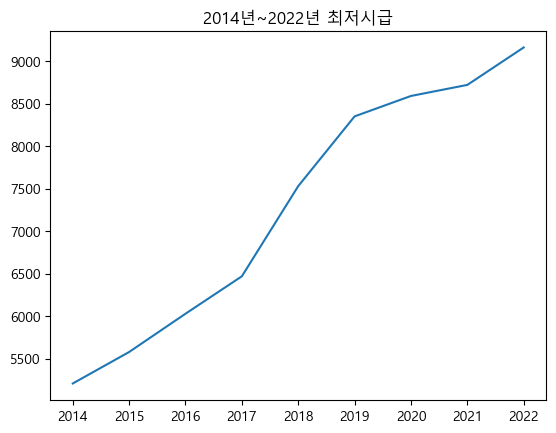

In [35]:
#2014년 ~ 2022년 년도 별 최저시급 그래프 그리기
x = np.arange(9) #총 9개 년도
y = wage[['시간급']] #년도별 시급 저장

#년도 표기를 위한 label
labels=['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

#선 그래프 그리기
plt.plot(x,y)
plt.title('2014년~2022년 최저시급')
plt.rc('font', family='malgun') #한글 폰트를 사용하기 위해
plt.xticks(x, labels)
plt.show()

In [36]:
#년도별 지역별 기름 값 평균 csv파일 업로드 데이터프레임으로 oil에 저장(column명이 한글이라서 encoding시, CP949로 해줌)
oil = pd.read_csv('./final_pro/주유소_지역별_평균판매가격.csv', encoding='CP949', index_col=0, header=0, engine='python')
oil.head()

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주,세종
구분,,,,,,,,,,,,,,,,,
2014년,1914.95,1817.74,1797.87,1824.67,1809.25,1818.83,1804.75,1833.61,1832.75,1827.06,1836.04,1816.84,1821.80,1809.87,1816.85,1834.57,1827.77
2015년,1596.74,1498.23,1486.95,1508.82,1493.06,1502.76,1496.09,1516.92,1515.01,1514.55,1516.07,1498.71,1505.42,1490.59,1494.92,1552.92,1517.80
2016년,1499.82,1391.94,1385.60,1404.11,1382.69,1399.45,1392.61,1409.66,1404.48,1402.41,1405.56,1387.47,1394.61,1384.29,1386.05,1454.12,1412.65
2017년,1589.52,1480.63,1469.48,1493.25,1473.53,1487.34,1481.38,1498.35,1495.77,1490.95,1492.57,1478.90,1482.03,1472.63,1470.68,1561.94,1504.78
2018년,1670.03,1563.90,1554.49,1581.74,1566.17,1576.26,1572.76,1589.66,1589.06,1585.75,1584.07,1569.25,1575.24,1567.02,1558.26,1626.14,1591.40


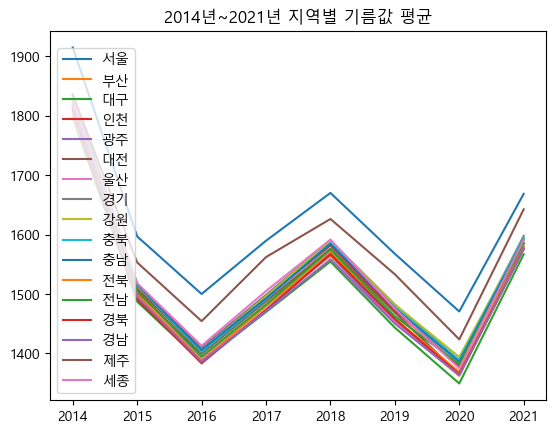

In [45]:
#2014년 ~ 2021년 년도 별, 전국별 기름 값 평균 그래프
x = np.arange(8) #총 8개 년도

#년도 표기를 위한 label
labels=['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

#위로 쌓아서 지역별로 저장해서 선 그래프 그리기
plt.plot(x,oil[['서울']])
plt.plot(x,oil[['부산']])
plt.plot(x,oil[['대구']])
plt.plot(x,oil[['인천']])
plt.plot(x,oil[['광주']])
plt.plot(x,oil[['대전']])
plt.plot(x,oil[['울산']])
plt.plot(x,oil[['경기']])
plt.plot(x,oil[['강원']])
plt.plot(x,oil[['충북']])
plt.plot(x,oil[['충남']])
plt.plot(x,oil[['전북']])
plt.plot(x,oil[['전남']])
plt.plot(x,oil[['경북']])
plt.plot(x,oil[['경남']])
plt.plot(x,oil[['제주']])
plt.plot(x,oil[['세종']])
rc('font', family=font) #한글 폰트를 사용하기 위해
plt.title('2014년~2021년 지역별 기름값 평균')
plt.xticks(x, labels)
plt.legend(['서울','부산','대구','인천','광주','대전','울산','경기','강원','충북','충남','전북','전남','경북','경남','제주','세종']) #지역 표기
plt.show()

In [40]:
#지역별 평균 값 내리기
oil.mean(axis='columns')

구분
2014년    1826.189412
2015년    1512.091765
2016년    1405.736471
2017년    1495.513529
2018년    1583.600000
2019년    1474.312941
2020년    1381.747059
2021년    1592.275882
dtype: float64

In [41]:
#지역별 평균 값 새로운 column 생성해서 넣어주기
oil['전국평균']=[1826.189412, 1512.091765, 1405.736471, 1495.513529, 1583.60000, 1474.312941, 1381.747059, 1592.275882]
oil

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주,세종,전국평균
구분,,,,,,,,,,,,,,,,,,
2014년,1914.95,1817.74,1797.87,1824.67,1809.25,1818.83,1804.75,1833.61,1832.75,1827.06,1836.04,1816.84,1821.80,1809.87,1816.85,1834.57,1827.77,1826.189412
2015년,1596.74,1498.23,1486.95,1508.82,1493.06,1502.76,1496.09,1516.92,1515.01,1514.55,1516.07,1498.71,1505.42,1490.59,1494.92,1552.92,1517.80,1512.091765
2016년,1499.82,1391.94,1385.60,1404.11,1382.69,1399.45,1392.61,1409.66,1404.48,1402.41,1405.56,1387.47,1394.61,1384.29,1386.05,1454.12,1412.65,1405.736471
2017년,1589.52,1480.63,1469.48,1493.25,1473.53,1487.34,1481.38,1498.35,1495.77,1490.95,1492.57,1478.90,1482.03,1472.63,1470.68,1561.94,1504.78,1495.513529
2018년,1670.03,1563.90,1554.49,1581.74,1566.17,1576.26,1572.76,1589.66,1589.06,1585.75,1584.07,1569.25,1575.24,1567.02,1558.26,1626.14,1591.40,1583.600000
2019년,1567.52,1452.00,1443.18,1472.11,1453.21,1468.58,1453.52,1482.21,1481.93,1477.74,1475.31,1458.39,1462.23,1457.39,1450.03,1533.02,1474.95,1474.312941
2020년,1470.37,1361.97,1349.13,1378.87,1365.27,1364.48,1368.16,1387.75,1393.73,1388.57,1385.37,1368.40,1381.65,1364.85,1363.00,1423.38,1374.75,1381.747059
2021년,1668.46,1575.91,1566.62,1590.62,1578.21,1584.69,1576.55,1597.57,1593.98,1593.91,1591.38,1580.27,1585.66,1575.75,1575.96,1642.41,1590.74,1592.275882


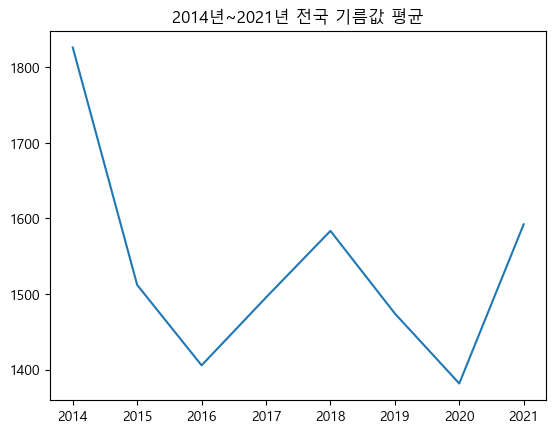

In [46]:
#2014년 ~ 2021년 년도 별, 전국 기름 값 평균 그래프
x = np.arange(8) #총 8개 년도

#년도 표기를 위한 label
labels=['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

#전국평균 불러와서 선 그래프 그리기
plt.plot(x,oil[['전국평균']])
rc('font', family=font) #한글 폰트를 사용하기 위해
plt.title('2014년~2021년 전국 기름값 평균')
plt.xticks(x, labels)
plt.show()

In [48]:
#년도별 휘발유 값 평균 csv파일 업로드 데이터프레임으로 oil2에 저장(column명이 한글이라서 encoding시, CP949로 해줌)
oil2 = pd.read_csv('./final_pro/주유소_평균판매가격_제품별.csv', encoding='CP949', index_col=0, header=0, engine='python')
oil2

,고급휘발유,보통휘발유
구분,,
2014년,2162.26,1827.28
2015년,1876.14,1510.40
2016년,1757.59,1402.64
2017년,1825.09,1491.30
2018년,1877.46,1581.37
2019년,1786.44,1472.44
2020년,1664.75,1381.39
2021년,1826.68,1590.56


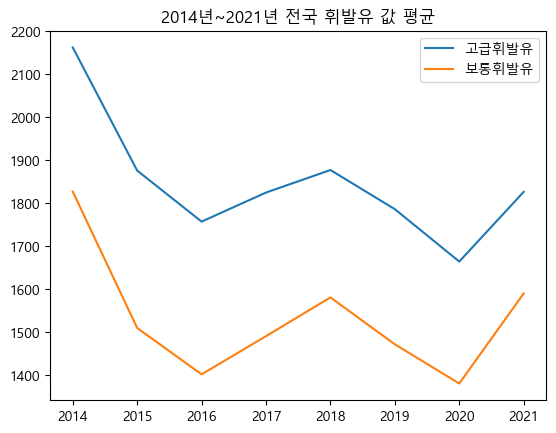

In [49]:
#2014년 ~ 2021년 년도 별 휘발유 값 평균(오토바이에는 휘발유만 이용된다고 함)
x = np.arange(8) #총 8개 년도

#년도 표기를 위한 label
labels=['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

#위로 쌓아서 고급휘발유, 보통휘발유 데이터 불러와서 선 그래프 그리기
plt.plot(x,oil2[['고급휘발유']])
plt.plot(x,oil2[['보통휘발유']])
rc('font', family=font) #한글 폰트를 사용하기 위해
plt.title('2014년~2021년 전국 휘발유 값 평균')
plt.xticks(x, labels)
plt.legend(['고급휘발유','보통휘발유'])
plt.show()

In [64]:
#2022년도 기준 월별 휘발유 값 평균 csv파일 업로드 데이터프레임으로 oil3에 저장(column명이 한글이라서 encoding시, CP949로 해줌)
oil3 = pd.read_csv('./final_pro/주유소_평균판매가격_휘발유.csv', encoding='CP949', index_col=0, header=0, engine='python')
oil3

,고급휘발유,보통휘발유
구분,,
2022년01월,1870.54,1635.22
2022년02월,1935.63,1714.61
2022년03월,2151.54,1938.46
2022년04월,2193.60,1976.53
2022년05월,2183.71,1967.07
2022년06월,2298.50,2084.00
2022년07월,2261.02,2029.99
2022년08월,2077.53,1792.19
2022년09월,2016.95,1730.00


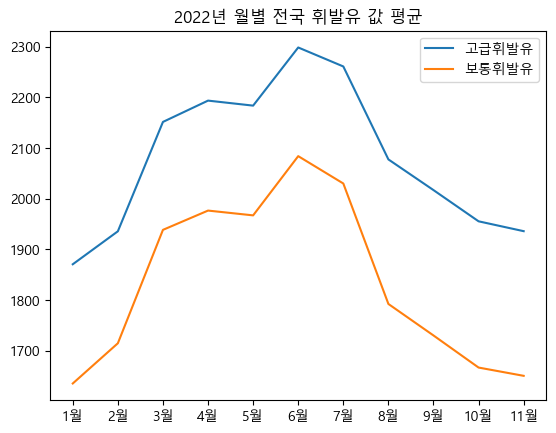

In [66]:
#2022년 월별 휘발유 값 평균(정확한 비교를 위해 2022년도 월별 데이터도 가져옴)
x = np.arange(11) #총 11개 년도

#월 표기를 위한 label
labels=['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월']

#위로 쌓아서 고급휘발유, 보통휘발유 데이터 불러와서 선 그래프 그리기
plt.plot(x,oil3[['고급휘발유']])
plt.plot(x,oil3[['보통휘발유']])
rc('font', family=font) #한글 폰트를 사용하기 위해
plt.title('2022년 월별 전국 휘발유 값 평균')
plt.xticks(x, labels)
plt.legend(['고급휘발유','보통휘발유'])
plt.show()